<a href="https://colab.research.google.com/github/valuin/final-ds-basic/blob/main/workout-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Val's Workout Data Analysis

## Import Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('./workout_data.csv')
df

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
0,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Behind Body Cable Curl,NaN,NaN,0,normal,17.0,9.0,NaN,NaN,NaN
1,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Behind Body Cable Curl,NaN,NaN,1,normal,19.5,9.0,NaN,NaN,NaN
2,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Behind Body Cable Curl,NaN,NaN,2,normal,19.5,10.0,NaN,NaN,NaN
3,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Lat Pulldown (Cable),NaN,NaN,0,normal,63.0,5.0,NaN,NaN,NaN
4,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Lat Pulldown (Cable),NaN,NaN,1,normal,58.5,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Seated Cable Row - V Grip (Cable),NaN,NaN,1,normal,39.5,7.0,NaN,NaN,NaN
1130,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Seated Cable Row - V Grip (Cable),NaN,NaN,2,normal,39.5,7.0,NaN,NaN,NaN
1131,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Preacher Curl (Machine),NaN,NaN,0,normal,15.0,6.0,NaN,NaN,NaN
1132,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Preacher Curl (Machine),NaN,NaN,1,normal,15.0,6.0,NaN,NaN,NaN


## Data Cleaning

In [3]:
df = df.drop(columns=['description', 'superset_id', 'exercise_notes', 'set_type', 'distance_km', 'duration_seconds', 'rpe'])
df.head()

,title,start_time,end_time,exercise_title,set_index,weight_kg,reps
0,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Behind Body Cable Curl,0,17.0,9.0
1,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Behind Body Cable Curl,1,19.5,9.0
2,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Behind Body Cable Curl,2,19.5,10.0
3,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Lat Pulldown (Cable),0,63.0,5.0
4,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Lat Pulldown (Cable),1,58.5,7.0


In [4]:
import pandas as pd
from IPython.display import display, Markdown

# Get unique exercise titles from the DataFrame
unique_titles = df['exercise_title'].unique()
n_unique = len(unique_titles)

# Create a DataFrame for the unique exercise titles (show up to 20)
table_df = pd.DataFrame({'Exercises': unique_titles[:20]})

# Display as a markdown-style table
md_table = table_df.to_markdown(index=False)
display(Markdown("### Unique Exercise Titles (first 20)\n" + md_table))

if n_unique > 20:
    print("...")

print(f"\nNumber of unique exercise titles: {n_unique}")

### Unique Exercise Titles (first 20)
| Exercises                         |
|:----------------------------------|
| Behind Body Cable Curl            |
| Lat Pulldown (Cable)              |
| Seated Row (Machine)              |
| Preacher Curl (Machine)           |
| Incline Bench Press (Dumbbell)    |
| crossbody cable extension         |
| Butterfly (Pec Deck)              |
| Chest Press (Machine)             |
| Crunch (Machine)                  |
| Bicep Curl (Cable)                |
| Running                           |
| Lateral Raise (Machine)           |
| Seated Cable Row - V Grip (Cable) |
| Overhead Press (Barbell)          |
| Lateral Raise (Dumbbell)          |
| Rear Delt Reverse Fly (Cable)     |
| Single Arm Lat Pulldown           |
| Seated Shoulder Press (Machine)   |
| Lat Pulldown (Machine)            |
| Shrug (Barbell)                   |

...

Number of unique exercise titles: 28


### Transformation

In [5]:

import pandas as pd

unique_titles = df['exercise_title'].unique()
n_unique = len(unique_titles)

exercise_to_muscle_group = {
    'Behind Body Cable Curl': 'Biceps',
    'Lat Pulldown (Cable)': 'Back',
    'Seated Row (Machine)': 'Back',
    'Preacher Curl (Machine)': 'Biceps',
    'Incline Bench Press (Dumbbell)': 'Chest',
    'crossbody cable extension': 'Triceps',
    'Butterfly (Pec Deck)': 'Chest',
    'Chest Press (Machine)': 'Chest',
    'Crunch (Machine)': 'Core/Abs',
    'Cable row Machine': 'Back',
    'Reverse Curl (Cable)': 'Biceps',
    'Grip Curl' : 'Biceps',
    'Egyptian Lateral Raise' : 'Shoulders',
    'Egyptian Lateral Raise (wristband)' : 'Shoulders',
    'Seated Cable Row - Bar Wide Grip' : 'Back',
    'Seated Dip Machine': 'Triceps',
    'Shrug (Dumbbell)': 'Shoulders',
    'Bicep Curl (Cable)': 'Biceps',
    'Running': 'Cardio/Legs',
    'Lateral Raise (Machine)': 'Shoulders',
    'Seated Cable Row - V Grip (Cable)': 'Back',
    'Overhead Press (Barbell)': 'Shoulders',
    'Lateral Raise (Dumbbell)': 'Shoulders',
    'Rear Delt Reverse Fly (Cable)': 'Shoulders',
    'Single Arm Lat Pulldown': 'Back',
    'Seated Shoulder Press (Machine)': 'Shoulders', 
    'Lat Pulldown (Machine)': 'Back',
    'Shrug (Barbell)': 'Shoulders'
}

# Add 'muscle_group' to DataFrame
# If an exercise title is not in the dictionary, it will default to 'Other' or 'Uncategorized'
df['muscle_group'] = df['exercise_title'].map(exercise_to_muscle_group).fillna('Uncategorized')

print("DataFrame with new 'muscle_group' column (first 10 rows):")
print(df[['exercise_title', 'muscle_group']].head(10).to_markdown(index=False))

# You can also check how many unique muscle groups were found
print(f"\nUnique Muscle Groups Categorized: {df['muscle_group'].unique()}")

DataFrame with new 'muscle_group' column (first 10 rows):
| exercise_title          | muscle_group   |
|:------------------------|:---------------|
| Behind Body Cable Curl  | Biceps         |
| Behind Body Cable Curl  | Biceps         |
| Behind Body Cable Curl  | Biceps         |
| Lat Pulldown (Cable)    | Back           |
| Lat Pulldown (Cable)    | Back           |
| Seated Row (Machine)    | Back           |
| Seated Row (Machine)    | Back           |
| Seated Row (Machine)    | Back           |
| Preacher Curl (Machine) | Biceps         |
| Preacher Curl (Machine) | Biceps         |

Unique Muscle Groups Categorized: ['Biceps' 'Back' 'Chest' 'Triceps' 'Core/Abs' 'Cardio/Legs' 'Shoulders']


In [6]:

df['start_time'] = pd.to_datetime(df['start_time'], format='%d %b %Y, %H:%M')
df['end_time'] = pd.to_datetime(df['end_time'], format='%d %b %Y, %H:%M')

df_sorted = df.sort_values(by='start_time')

print("\n--- Time Range (based on start_time) ---")
first_date_full = df_sorted['start_time'].iloc[0].strftime('%d %b %Y')
last_date_full = df_sorted['end_time'].iloc[-1].strftime('%d %b %Y')
print(f"First Workout Session: {first_date_full}")
print(f"Last Workout Session: {last_date_full}")



--- Time Range (based on start_time) ---
First Workout Session: 15 Jun 2024
Last Workout Session: 16 May 2025


In [7]:
df['workout_duration'] = df['end_time'] - df['start_time']
df['workout_duration_minutes'] = df['workout_duration'].dt.total_seconds() / 60

df.head()


,title,start_time,end_time,exercise_title,set_index,weight_kg,reps,muscle_group,workout_duration,workout_duration_minutes
0,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,0,17.0,9.0,Biceps,0 days 00:57:00,57.0
1,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,1,19.5,9.0,Biceps,0 days 00:57:00,57.0
2,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,2,19.5,10.0,Biceps,0 days 00:57:00,57.0
3,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),0,63.0,5.0,Back,0 days 00:57:00,57.0
4,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),1,58.5,7.0,Back,0 days 00:57:00,57.0


In [8]:
df = df[df['workout_duration_minutes'] != 0]

In [9]:
df['set_volume'] = df['weight_kg'] * df['reps']

In [10]:
df['workout_id'] = df['title'] + '_' + df['start_time'].astype(str)
workout_volume = df.groupby('workout_id')['set_volume'].sum().reset_index()
workout_volume = workout_volume.rename(columns={'set_volume': 'total_workout_volume'})
workout_volume = workout_volume[workout_volume['total_workout_volume'] > 0]
df.head()
workout_volume.sort_values(by='total_workout_volume', ascending=True)

,workout_id,total_workout_volume
92,Push day (chest focus)_2025-02-17 19:54:00,792.79
28,Pull day (arms focus)_2025-01-15 21:25:00,798.00
100,Push day (chest focus)_2025-04-30 21:10:00,835.64
66,Push day (chest focus)_2024-08-08 19:03:00,864.00
89,Push day (chest focus)_2025-01-20 18:53:00,942.22
...,...,...
83,Push day (chest focus)_2024-12-16 15:25:00,3459.50
10,Pull day (arms focus)_2024-08-20 20:17:00,3675.50
44,Pull day (back focus)_2024-08-01 17:36:00,3950.50
51,Pull day (back focus)_2024-10-26 20:02:00,4040.00


In [11]:
# Apply the Epley formula (only for sets with reps > 0)
df['estimated_1rm'] = df.apply(
    lambda row: row['weight_kg'] * (1 + row['reps'] / 30) if row['reps'] > 0 else None,
    axis=1
)
df.head()

,title,start_time,end_time,exercise_title,set_index,weight_kg,reps,muscle_group,workout_duration,workout_duration_minutes,set_volume,workout_id,estimated_1rm
0,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,0,17.0,9.0,Biceps,0 days 00:57:00,57.0,153.0,Pull day (arms focus)_2025-05-16 20:47:00,22.10
1,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,1,19.5,9.0,Biceps,0 days 00:57:00,57.0,175.5,Pull day (arms focus)_2025-05-16 20:47:00,25.35
2,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,2,19.5,10.0,Biceps,0 days 00:57:00,57.0,195.0,Pull day (arms focus)_2025-05-16 20:47:00,26.00
3,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),0,63.0,5.0,Back,0 days 00:57:00,57.0,315.0,Pull day (arms focus)_2025-05-16 20:47:00,73.50
4,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),1,58.5,7.0,Back,0 days 00:57:00,57.0,409.5,Pull day (arms focus)_2025-05-16 20:47:00,72.15


In [12]:
df['day_of_week'] = df['start_time'].dt.day_name()
df['hour_of_day'] = df['start_time'].dt.hour

## Workout Analysis

### Training Volume Trend

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['workout_id'] = df['title'] + '_' + df['start_time'].astype(str)

# Calculate total workout volume again, but keep the start_time associated
workout_volume = df.groupby('workout_id').agg(
    total_workout_volume=('set_volume', 'sum'),
    start_time=('start_time', 'first')
).reset_index()

workout_volume['start_time'] = pd.to_datetime(workout_volume['start_time'])

print("--- Workout Volume DataFrame (first 5 rows) ---")
print(workout_volume.head())

# Set a style for the plots
sns.set_style("whitegrid")

--- Workout Volume DataFrame (first 5 rows) ---
                                  workout_id  total_workout_volume  \
0    Afternoon workout 💪_2024-07-22 17:53:00                1114.0   
1     Evening workout 🏋️_2024-12-19 21:51:00                1135.0   
2     Evening workout 🏋️_2025-04-07 21:28:00                   0.0   
3  Pull day (arms focus)_2024-06-15 20:19:00                2287.5   
4  Pull day (arms focus)_2024-06-29 18:46:00                2816.0   

           start_time  
0 2024-07-22 17:53:00  
1 2024-12-19 21:51:00  
2 2025-04-07 21:28:00  
3 2024-06-15 20:19:00  
4 2024-06-29 18:46:00  


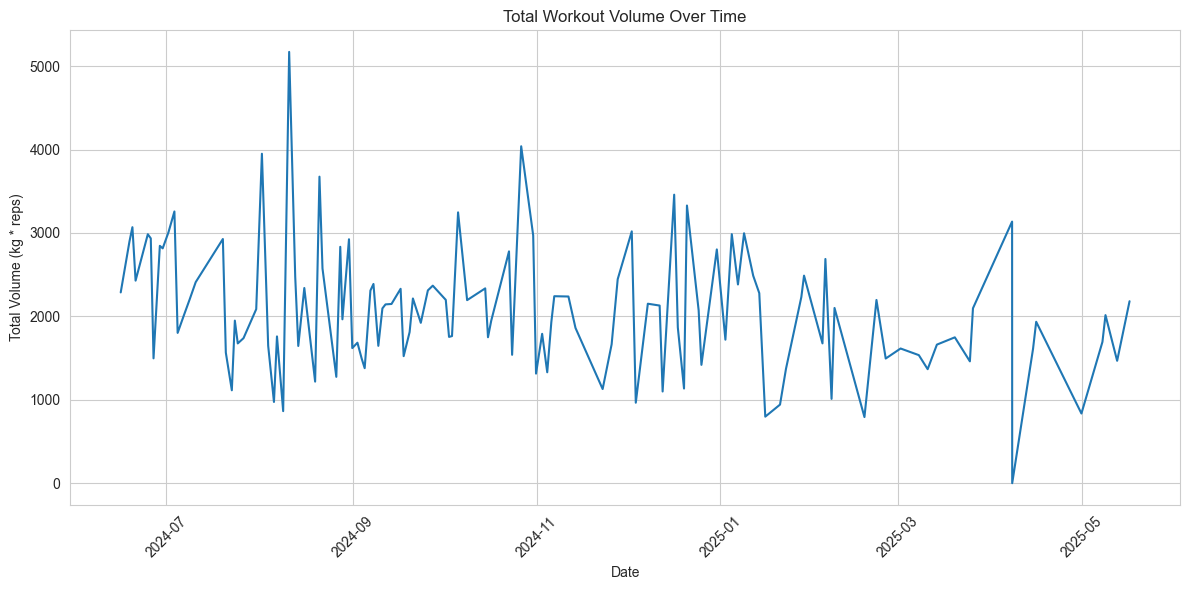

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=workout_volume, x='start_time', y='total_workout_volume')
plt.title('Total Workout Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume (kg * reps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Workout Volume Based on Muscle Groups

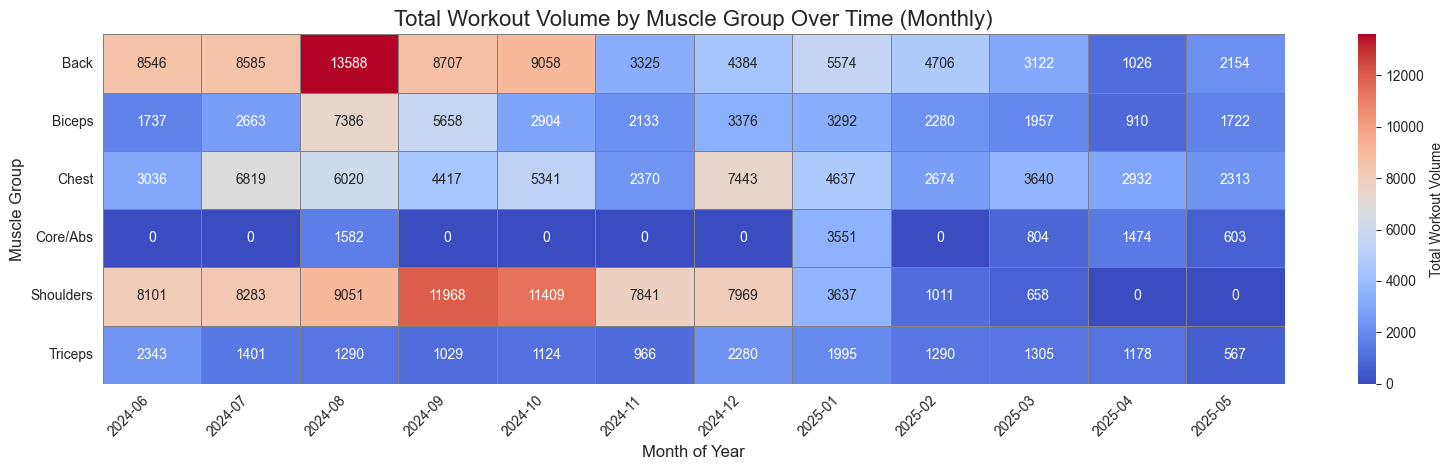

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['start_time'] = pd.to_datetime(df['start_time'])
df['month_of_year'] = df['start_time'].dt.to_period('M').astype(str)

# 2. Aggregate total volume by muscle group and month
volume_by_muscle_group_month = df.groupby(['muscle_group', 'month_of_year'])['set_volume'].sum().reset_index()

heatmap_data_monthly = volume_by_muscle_group_month.pivot_table(
    index='muscle_group',
    columns='month_of_year',
    values='set_volume'
).fillna(0) # Fill NaN values (months with no activity for a muscle group) with 0

# This ensures the heatmap progresses correctly in time
heatmap_data_monthly = heatmap_data_monthly.reindex(columns=sorted(heatmap_data_monthly.columns))
heatmap_data_monthly = heatmap_data_monthly.drop('Cardio/Legs', errors='ignore')

plt.figure(figsize=(16, len(heatmap_data_monthly) * 0.8))
sns.heatmap(
    heatmap_data_monthly,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    linewidths=.5,
    linecolor='gray',
    cbar_kws={'label': 'Total Workout Volume'}
)

plt.title('Total Workout Volume by Muscle Group Over Time (Monthly)', fontsize=16)
plt.xlabel('Month of Year', fontsize=12)
plt.ylabel('Muscle Group', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()



### Average Training Intensity 

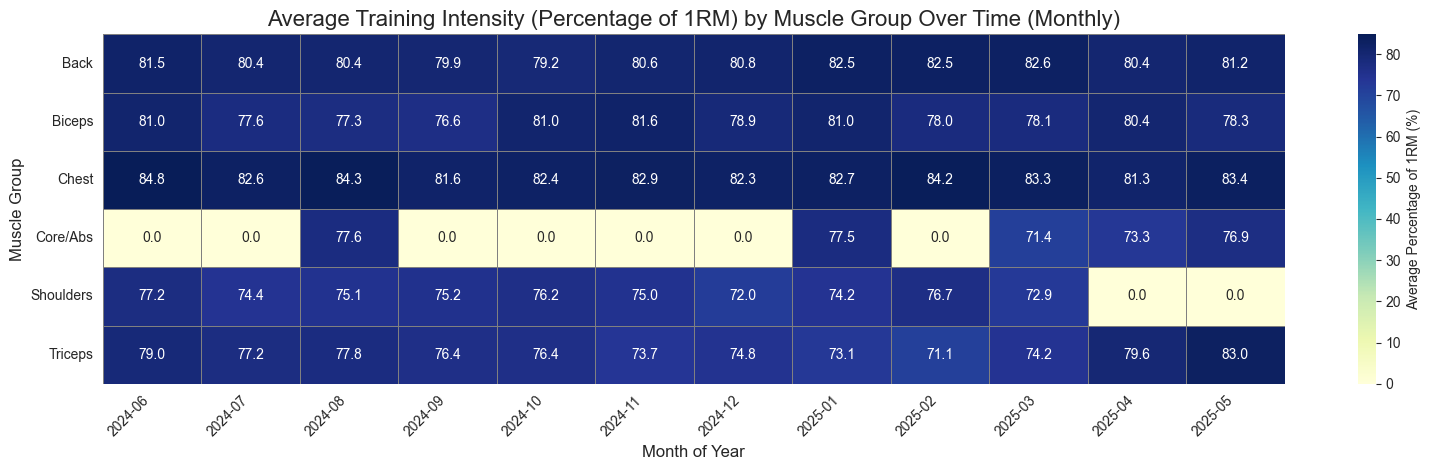

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df['start_time'] = pd.to_datetime(df['start_time'])
df['month_of_year'] = df['start_time'].dt.to_period('M').astype(str)
df['weight_lifted'] = df['set_volume'] / df['reps']


# Ensure estimated_1rm is not zero to avoid division by zero
df['estimated_1rm'] = df['estimated_1rm'].replace(0, np.nan)
df['percentage_of_1rm'] = (df['weight_lifted'] / df['estimated_1rm']) * 100
df['percentage_of_1rm'] = df['percentage_of_1rm'].replace([np.inf, -np.inf], np.nan)


# 1. Aggregate mean percentage_of_1rm for heatmap
agg_avg_percent_1rm = df.groupby(['muscle_group', 'month_of_year'])['percentage_of_1rm'].mean().reset_index()

# 2. Pivot for heatmap
heatmap_avg_percent_1rm = agg_avg_percent_1rm.pivot_table(
    index='muscle_group',
    columns='month_of_year',
    values='percentage_of_1rm'
).fillna(0)

heatmap_avg_percent_1rm = heatmap_avg_percent_1rm.reindex(columns=sorted(heatmap_avg_percent_1rm.columns))

# Plot heatmap
plt.figure(figsize=(16, len(heatmap_avg_percent_1rm) * 0.8))
sns.heatmap(
    heatmap_avg_percent_1rm,
    annot=True,        
    fmt=".1f",        
    cmap="YlGnBu",    
    linewidths=.5,     
    linecolor='gray',
    cbar_kws={'label': 'Average Percentage of 1RM (%)'}
)

plt.title('Average Training Intensity (Percentage of 1RM) by Muscle Group Over Time (Monthly)', fontsize=16)
plt.xlabel('Month of Year', fontsize=12)
plt.ylabel('Muscle Group', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Workout Volume Based on Duration

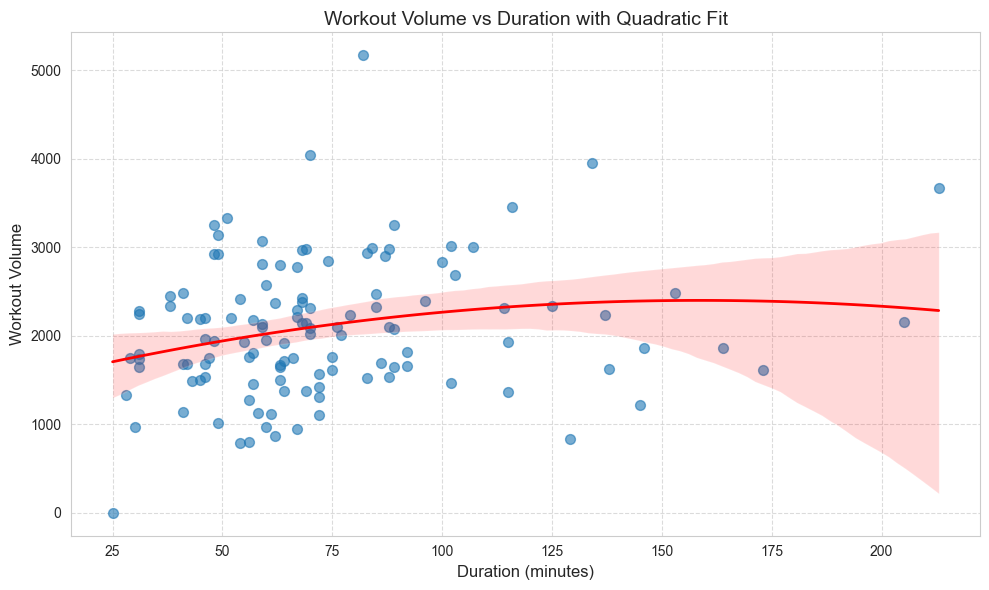


Correlation between duration and volume: 0.20

Average Workout Volume by Duration Bin:
 duration_bin
(24.812, 62.6]    1889.573462
(62.6, 100.2]     2191.634902
(100.2, 137.8]    2384.725000
(137.8, 175.4]    1778.416667
(175.4, 213.0]    2913.750000
Name: total_workout_volume, dtype: float64


C:\Users\valtrizt\AppData\Local\Temp\ipykernel_22740\2476251124.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = workout_stats.groupby('duration_bin')['total_workout_volume'].mean()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

workout_duration_per_workout = df.groupby('workout_id')['workout_duration_minutes'].first().reset_index()
workout_stats = pd.merge(workout_volume, workout_duration_per_workout, on='workout_id', how='inner')

plt.figure(figsize=(10, 6))
sns.regplot(x='workout_duration_minutes', y='total_workout_volume',
            data=workout_stats,
            order=2,
            ci=95, 
            scatter_kws={'alpha':0.6, 's': 50},
            line_kws={'color': 'red', 'linewidth': 2})

plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Workout Volume', fontsize=12)
plt.title('Workout Volume vs Duration', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

correlation = workout_stats['workout_duration_minutes'].corr(workout_stats['total_workout_volume'])
print(f"\nCorrelation between duration and volume: {correlation:.2f}")

workout_stats['duration_bin'] = pd.cut(workout_stats['workout_duration_minutes'], bins=5)
grouped = workout_stats.groupby('duration_bin')['total_workout_volume'].mean()
print("\nAverage Workout Volume by Duration Bin:\n", grouped)

### Strength Progression for Select Exercises

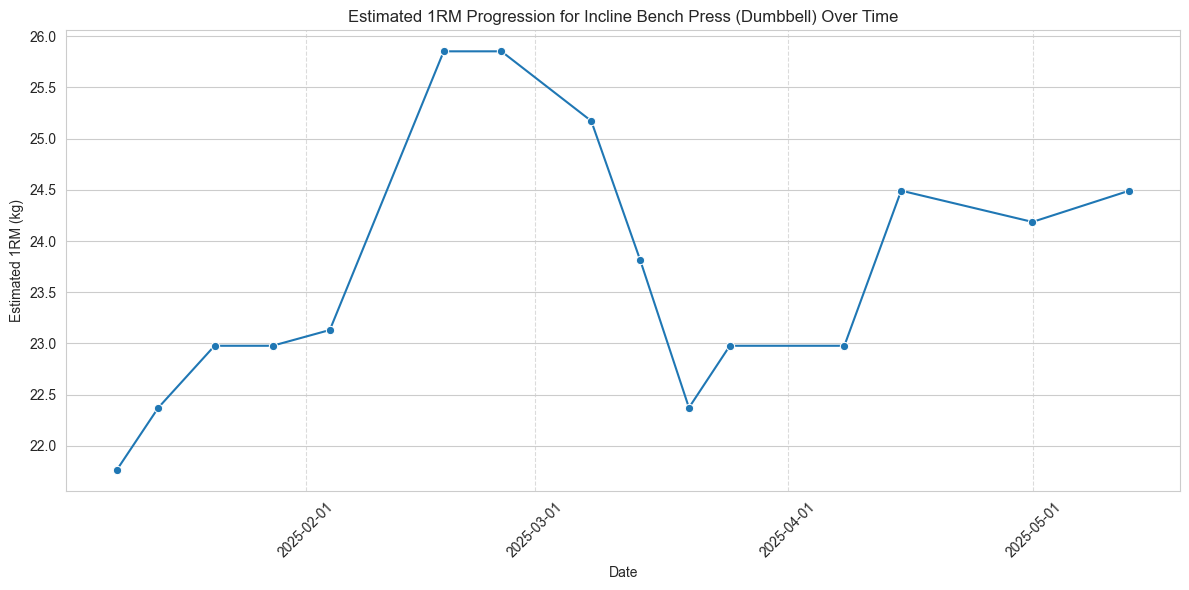

In [ ]:
import matplotlib.dates as mdates

exercise_to_analyze = 'Incline Bench Press (Dumbbell)'
# Filter data for the specific exercise
exercise_data = df[df['exercise_title'] == exercise_to_analyze].copy()
max_1rm_per_workout = exercise_data.groupby('workout_id').agg(
    max_estimated_1rm=('estimated_1rm', 'max'),
    start_time=('start_time', 'first')
).reset_index()

max_1rm_per_workout['start_time'] = pd.to_datetime(max_1rm_per_workout['start_time'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=max_1rm_per_workout, x='start_time', y='max_estimated_1rm', marker='o')
plt.title(f'Estimated 1RM Progression for {exercise_to_analyze} Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated 1RM (kg)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Best Performing Days and Hours

In [19]:
workout_volume['day_of_week'] = workout_volume['start_time'].dt.day_name()
workout_volume['hour_of_day'] = workout_volume['start_time'].dt.hour

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
workout_volume['day_of_week'] = pd.Categorical(workout_volume['day_of_week'], categories=day_order, ordered=True)

sns.set_style("whitegrid")


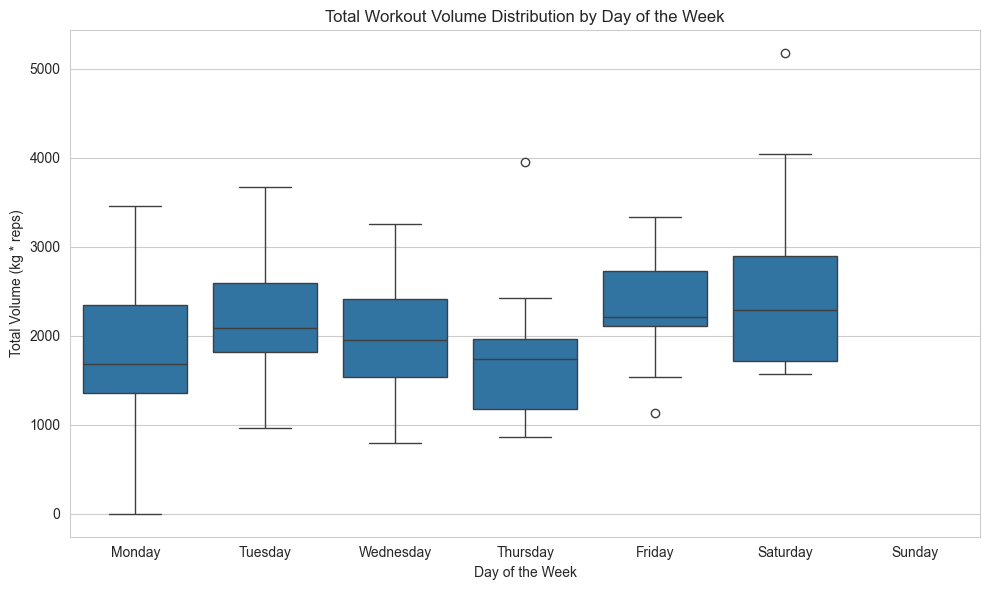

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=workout_volume, x='day_of_week', y='total_workout_volume')
plt.title('Total Workout Volume Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Volume (kg * reps)')
plt.tight_layout()
plt.show()

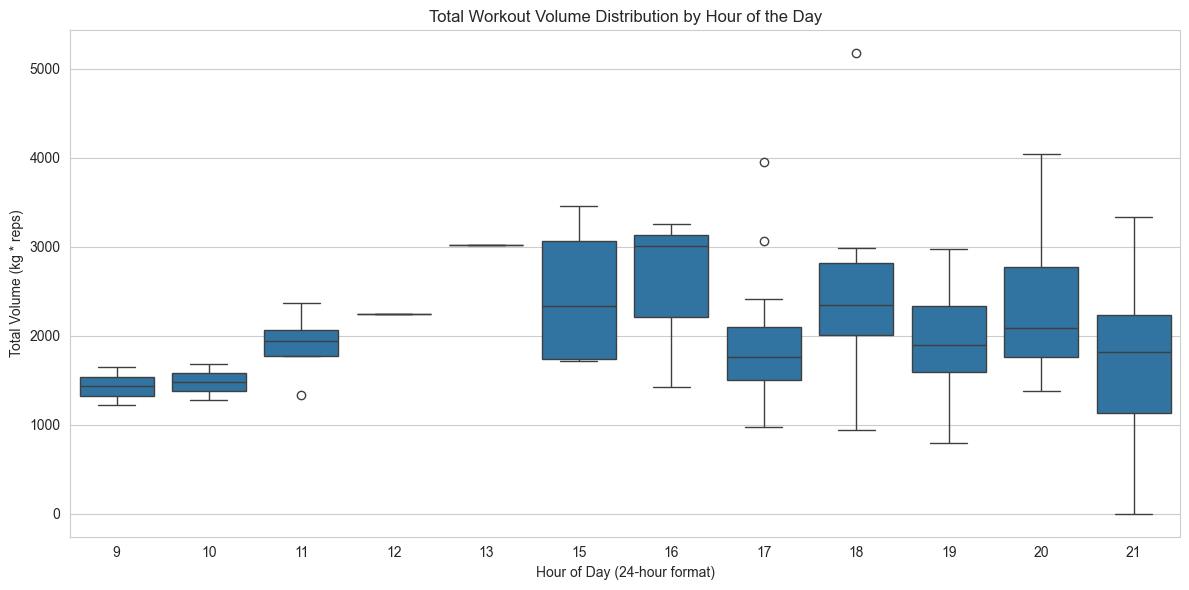

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=workout_volume, x='hour_of_day', y='total_workout_volume')
plt.title('Total Workout Volume Distribution by Hour of the Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Total Volume (kg * reps)')
plt.tight_layout()
plt.show()

### Average Weight Used Per Exercise

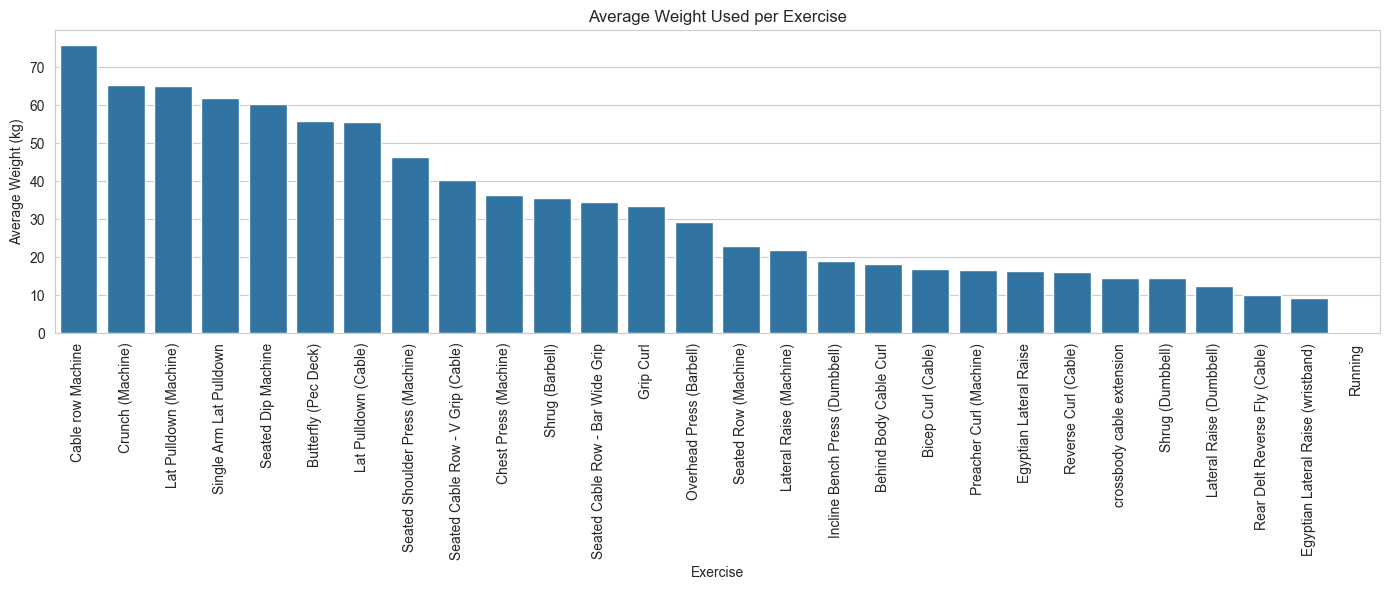

In [ ]:

exercise_weights = df.groupby('exercise_title')['weight_kg'].mean().reset_index()

exercise_weights = exercise_weights.sort_values(by='weight_kg', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=exercise_weights, x='exercise_title', y='weight_kg')
plt.title('Average Weight Used per Exercise')
plt.xlabel('Exercise')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Data Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

modeling_df = pd.merge(
    volume_by_muscle_group_month.rename(columns={'set_volume': 'current_month_total_volume'}),
    agg_avg_percent_1rm.rename(columns={'percentage_of_1rm': 'current_month_avg_percent_1rm'}),
    on=['muscle_group', 'month_of_year'],
    how='inner' # Only include muscle groups that have both volume and %1RM data for a month
)

modeling_df['month_of_year_dt'] = pd.to_datetime(modeling_df['month_of_year'])
modeling_df = modeling_df.sort_values(by=['muscle_group', 'month_of_year_dt']).reset_index(drop=True)

modeling_df['next_month_avg_percent_1rm'] = modeling_df.groupby('muscle_group')['current_month_avg_percent_1rm'].shift(-1)

# Drop rows where 'next_month_avg_percent_1rm' is NaN (i.e., the last month for each muscle group)
modeling_df.dropna(subset=['next_month_avg_percent_1rm'], inplace=True)

# Also drop rows where current_month_avg_percent_1rm is NaN (e.g., if a group was skipped for a month)
modeling_df.dropna(subset=['current_month_avg_percent_1rm', 'current_month_total_volume'], inplace=True)

print("--- Prepared Modeling Data (first 10 rows) ---")
print(modeling_df.head(10).to_markdown(index=False))
print(f"\nTotal observations for modeling: {len(modeling_df)}")


--- Prepared Modeling Data (first 10 rows) ---
| muscle_group   | month_of_year   |   current_month_total_volume |   current_month_avg_percent_1rm | month_of_year_dt    |   next_month_avg_percent_1rm |
|:---------------|:----------------|-----------------------------:|--------------------------------:|:--------------------|-----------------------------:|
| Back           | 2024-06         |                       8546.5 |                         81.5468 | 2024-06-01 00:00:00 |                      80.4486 |
| Back           | 2024-07         |                       8585   |                         80.4486 | 2024-07-01 00:00:00 |                      80.3603 |
| Back           | 2024-08         |                      13588   |                         80.3603 | 2024-08-01 00:00:00 |                      79.8735 |
| Back           | 2024-09         |                       8707   |                         79.8735 | 2024-09-01 00:00:00 |                      79.2039 |
| Back           | 2024

In [29]:
# --- Step 2: Data Splitting (Train-Test Split) ---

# Define features (X) and target (y)
X = modeling_df[['current_month_total_volume', 'current_month_avg_percent_1rm']]
y = modeling_df['next_month_avg_percent_1rm']

# Split the data
# test_size=0.2 means 20% of data for testing, 80% for training
# random_state for reproducibility (you get the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} observations")
print(f"Testing set size: {len(X_test)} observations")



Training set size: 45 observations
Testing set size: 12 observations


In [33]:

# --- Step 3: Choose a Simple Model (Linear Regression) ---
model = LinearRegression()
print("\nModel chosen: Linear Regression")

# --- Step 4: Train the Model ---
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete.")


Model chosen: Linear Regression
Training the model...
Model training complete.


In [ ]:
# --- Step 5: Evaluate the Model ---
print("\nEvaluating the model on the test set...")
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
# MAE tells on average, how much the predictions deviate from the actual values
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared (R2)
# R2 indicates the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (X)
# 1.0 is a perfect prediction, 0.0 means no linear relationship captured.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2:.2f}")


Evaluating the model on the test set...
Mean Absolute Error (MAE): 1.67
R-squared (R2 Score): 0.42


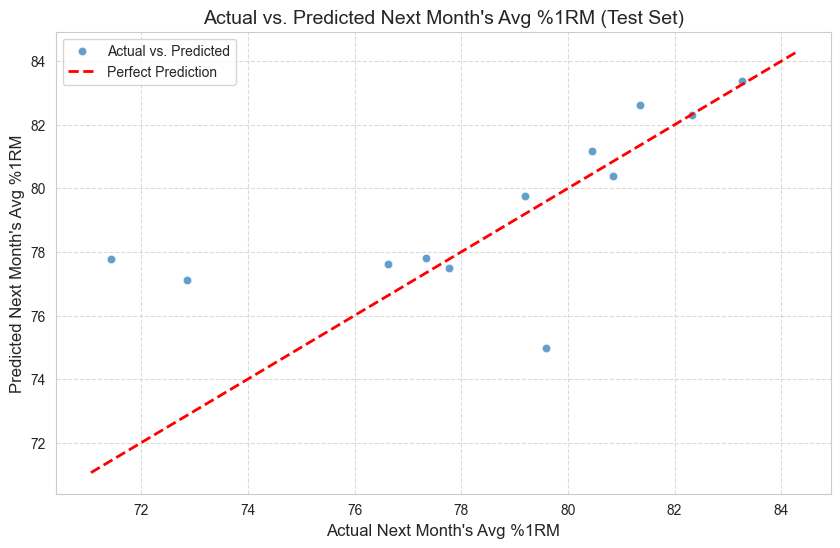


--- Model Coefficients ---
Intercept: 12.39
Coefficient for 'current_month_total_volume': 0.0000
Coefficient for 'current_month_avg_percent_1rm': 0.8432


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label='Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Next Month's Avg %1RM", fontsize=12)
plt.ylabel("Predicted Next Month's Avg %1RM", fontsize=12)
plt.title("Actual vs. Predicted Next Month's Avg %1RM (Test Set)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()
plt.show()

print("\n--- Model Coefficients ---")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for 'current_month_total_volume': {model.coef_[0]:.4f}")
print(f"Coefficient for 'current_month_avg_percent_1rm': {model.coef_[1]:.4f}")